
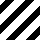
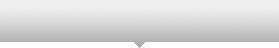
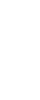
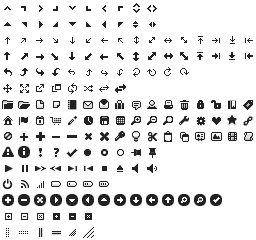
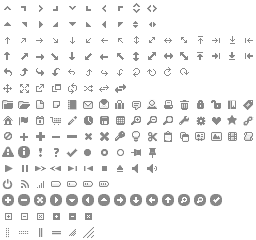
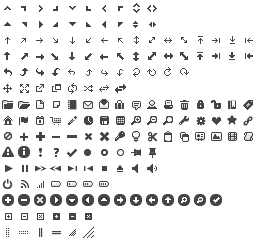
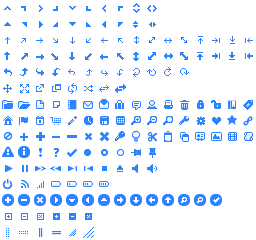
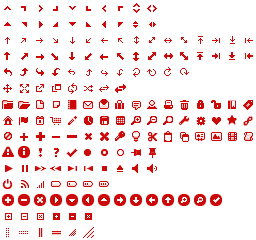
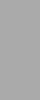
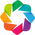
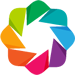
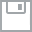
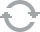
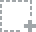
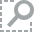
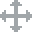
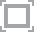
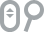

In [1]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
output_notebook()

PR https://github.com/bokeh/bokeh/pull/2148/ introduces new properties on a plot that help improve responsiveness of js interactions:

````
+    lod_factor = Int(10, help="""
+    Decimation factor to use when applying level-of-detail decimation.
+    """)
+
+    lod_threshold = Int(2000, help="""
+    A number of data points, above which level-of-detail downsampling may
+    be performed by glyph renderers. Set to ``None`` to disable any
+    level-of-detail downsampling.
+    """)
+
+    lod_interval = Int(300, help="""
+    Interval (in ms) during which an interactive tool event will enable
+    level-of-detail downsampling.
+    """)
+
+    lod_timeout = Int(500, help="""
+    Timeout (in ms) for checking whether interactive tool events are still
+    occurring. Once level-of-detail mode is enabled, a check is made every
+    ``lod_timeout`` ms. If no interactive tool events have happened,
+    level-of-detail mode is disabled.
+    """)
````

In [10]:
N = 20000

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

p = figure(tools="wheel_zoom, pan, box_zoom, reset") # NOTE: LOD only applies to pan, wheel_zoom, and reset
p.scatter(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

In [11]:
p.lod_factor = 100 # You can see the number of decimated points as gray when you pan or zoom
p.lod_threshold = 100
p.lod_interval = 300  # Set this really high and the interaction will take a long time to render
p.lod_timeout = 500

In [12]:
show(p)